In [2]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torchvision.models


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
def loadData():
  np.random.seed(100) 
  #Ensuring data is a 224x224 image, used the centercrop function to crop at center
  transform = transforms.Compose([transforms.Resize((224,224)), 
                                transforms.ToTensor()])

  
  numWorkers = 1
  batchSize = 1

  classes = ['COVID-19', 'Normal', 'Pneumonial-Bacterial', 'Pneumonial-Viral']
  #datasetPath = '/content/gdrive/MyDrive/APS360/ProgressReport/APS360SampleData'

  datasetPath = '/content/gdrive/MyDrive/Winter2021/APS360/project'


  sampleSet = torchvision.datasets.ImageFolder(datasetPath, transform=transform)
  print(len(sampleSet))
  #All the data loaded is valid so we can use any index
  train = int((len(sampleSet) * 0.8))
  #val = int((len(sampleSet) * 0.1))
  test = int((len(sampleSet) * 0.2))

  # Used the random_split data function to split the dataset into a 70, 20, 10 proportion 
  trainData, testData = torch.utils.data.random_split(sampleSet,
                  [train,test],generator=torch.Generator().manual_seed(100))
  
  print(trainData, testData)  

  #Load all the data
  trainLoader = torch.utils.data.DataLoader(trainData, batch_size=batchSize, 
                                            num_workers= numWorkers,
                                            shuffle=True)
  # valLoader = torch.utils.data.DataLoader(valData, batch_size=batchSize, 
  #                                         num_workers= numWorkers,
  #                                                 shuffle=True)
  testLoader = torch.utils.data.DataLoader(testData, batch_size=batchSize, 
                                           num_workers= numWorkers,
                                                  shuffle=True)
  return trainLoader, testLoader

In [5]:
test = loadData()
trainLoader = test[0]
# valLoader = test[1]
testLoader = test[1]
print(len(trainLoader),len(testLoader))

950
<torch.utils.data.dataset.Subset object at 0x7f82f2c2e550> <torch.utils.data.dataset.Subset object at 0x7f82f2c2ea10>
760 190


In [ ]:
# classes = ['COVID-19', 'Normal', 'Pneumonial-Bacterial', 'Pneumonial-Viral']
# dataiter = iter(trainLoader)
# images, labels = dataiter.next()
# image = np.transpose(images[0], (1, 2, 0))
# label = classes[labels[0]]
# for images, labels in trainLoader:
#   print(classes[labels[0]])

In [ ]:
#links
#https://towardsdatascience.com/dealing-with-multiclass-data-78a1a27c5dcc
#https://www.codementor.io/@agarrahul01/multiclass-classification-using-random-forest-on-scikit-learn-library-hkk4lwawu

In [6]:
train_x = []
train_y = []

for x, y in trainLoader:
  train_x.append(x)
  train_y.append(y)

train_x = torch.stack(train_x)
train_y = torch.stack(train_y)
train_x = train_x.reshape(760, 224*224*3)
print(train_x.shape)
print(train_y.shape)

torch.Size([760, 150528])
torch.Size([760, 1])


In [7]:
test_x = []
test_y = []
for x, y in testLoader:
  test_x.append(x)
  test_y.append(y)

test_x = torch.stack(test_x)
test_x = test_x.reshape(190, 224*224*3)
test_y = torch.stack(test_y)
print(test_x.shape)
print(test_y.shape)

torch.Size([190, 150528])
torch.Size([190, 1])


In [35]:
# Create a Gaussian Classfier
model = RandomForestClassifier(n_estimators = 220, oob_score=True, criterion = 'entropy', random_state = 100)
model.fit(train_x,train_y)
#predict2 = model.predict(train_x)
predict = model.predict(test_x)
value = accuracy_score(test_y,predict)
#value2 = accuracy_score(train_y,predict2)
print(value)
#print(value2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.7


In [26]:
print(predict)
print(trainLoader)

[1 3 1 1 3 3 1 2 1 1 3 2 2 0 2 3 1 1 1 3 2 2 2 3 1 0 2 2 1 2 1 0 3 3 1 3 1
 3 2 3 2 3 0 0 3 2 0 1 3 0 2 0 0 1 0 2 0 1 1 0 2 2 3 1 3 3 3 1 3 1 1 0 3 3
 1 2 2 0 0 1 0 0 2 1 1 3 2 1 0 0 2 1 0 1 1 0 2 1 0 1 3 2 2 2 3 2 1 2 2 2 2
 3 0 1 3 3 0 0 3 3 1 1 3 0 0 0 2 0 1 3 1 2 2 2 0 3 1 3 1 1 3 0 3 0 1 3 2 3
 0 1 2 3 3 1 3 0 3 0 3 3 1 2 2 0 2 1 3 2 3 3 2 3 2 1 3 2 2 1 3 3 0 3 0 3 1
 1 1 3 3 0]


[[0.94117647 0.         0.         0.05882353]
 [0.07017544 0.8245614  0.07017544 0.03508772]
 [0.05555556 0.         0.5        0.44444444]
 [0.         0.08888889 0.31111111 0.6       ]]


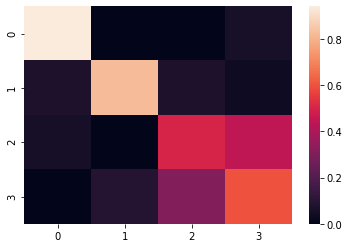

In [27]:
labels = [0,1,2,3]
conf_mat = confusion_matrix(test_y, predict, normalize='true')
print(conf_mat)
# Visualize it as a heatmap
import seaborn
seaborn.heatmap(conf_mat)
plt.show()

In [28]:
print(test_y.shape)
predictions = torch.from_numpy(predict)
print(predictions.shape)

torch.Size([190, 1])
torch.Size([190])


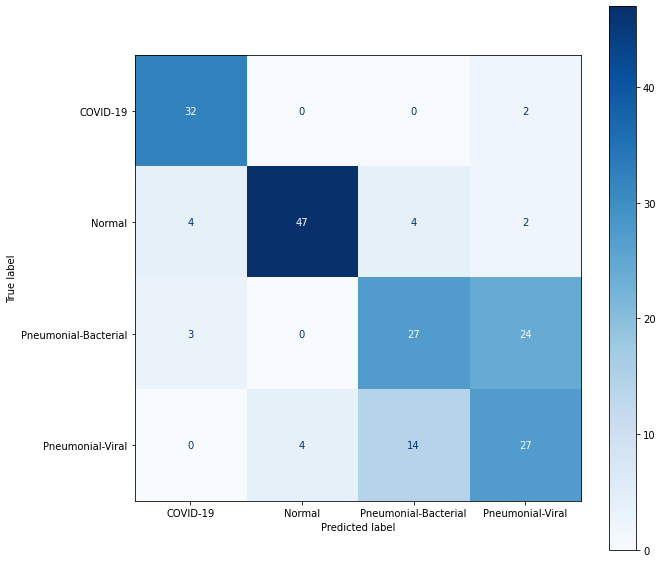

In [36]:
#plt.figure(figsize=(100, 100))
fig, ax = plt.subplots(figsize=(10, 10))
classes = ['COVID-19', 'Normal', 'Pneumonial-Bacterial', 'Pneumonial-Viral']
disp = plot_confusion_matrix(model, test_x, test_y,
                            display_labels=classes,
                            cmap=plt.cm.Blues, ax=ax)
#disp.ax_.set_adjustable()
#print(disp.confusion_matrix)
plt.show()